In [1]:
require(MASS)
require(ISLR)

Loading required package: MASS

Loading required package: ISLR



In [2]:
dimnames(USArrests)

[[1]]
 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       

[[2]]
[1] "Murder"   "Assault"  "UrbanPop" "Rape"

In [3]:
dim(USArrests)

[1] 50  4

In [7]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [8]:
apply(USArrests, 2, var)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

*scale the variables*

In [15]:
pca.out= prcomp(USArrests, scale = TRUE, rank = 2)

In [16]:
pca.out

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 2):
                PC1        PC2
Murder   -0.5358995  0.4181809
Assault  -0.5831836  0.1879856
UrbanPop -0.2781909 -0.8728062
Rape     -0.5434321 -0.1673186

In [11]:
names(pca.out)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [14]:
?prcomp

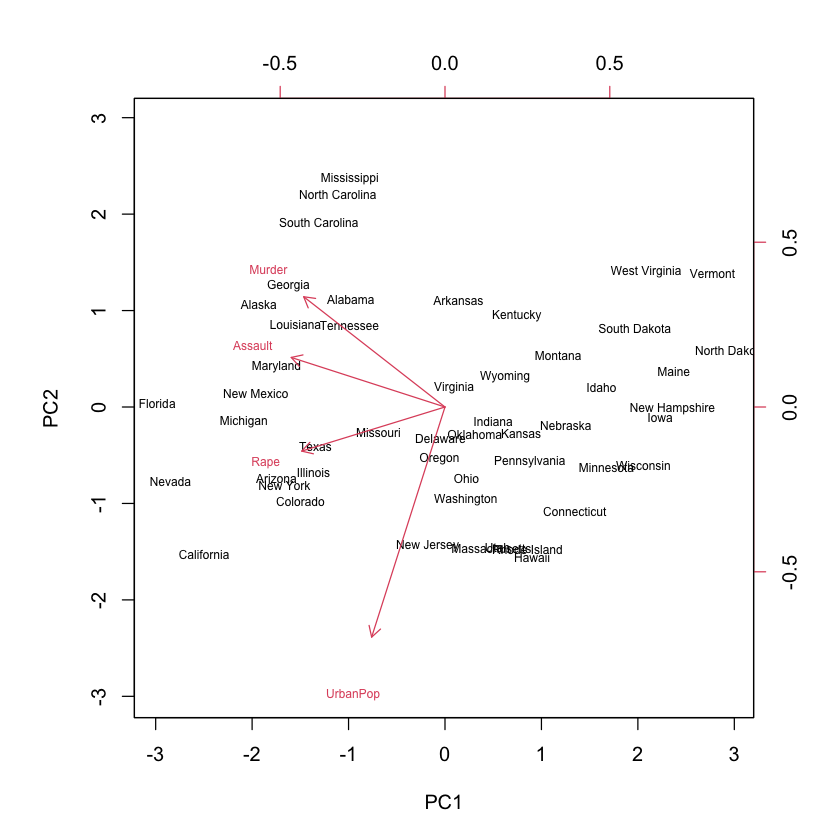

In [17]:
biplot(pca.out, scale = 0, cex = 0.6)

# k-means clustering

In [19]:
set.seed(101)
x = matrix(rnorm(100*2), 100, 2)
xmean = matrix(rnorm(8, sd=4), 4, 2)

In [20]:
which = sample(1:4, 100, replace = TRUE)

In [21]:
x = x+xmean[which,]

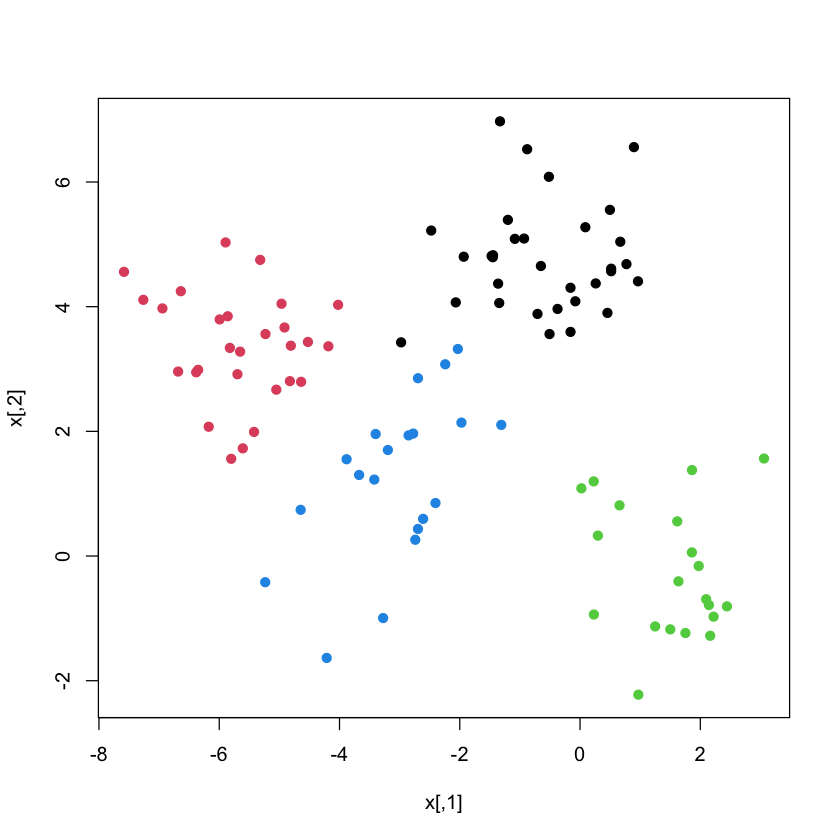

In [22]:
plot(x, col = which, pch = 19)

In [23]:
km.out = kmeans(x, 4, nstart=15)

#nstart = 15 ; 15 no of random starts

In [24]:
km.out

K-means clustering with 4 clusters of sizes 32, 28, 20, 20

Cluster means:
        [,1]       [,2]
1 -0.5787702  4.7639233
2 -5.6518323  3.3513316
3  1.4989983 -0.2412154
4 -3.1104142  1.2535711

Clustering vector:
  [1] 2 4 1 2 4 1 2 4 1 1 3 1 1 3 4 3 2 3 2 2 2 2 2 3 1 1 4 2 4 1 2 3 2 4 4 3 3
 [38] 4 3 3 2 4 4 2 2 3 2 1 2 4 2 1 1 3 3 4 3 1 1 1 4 2 2 2 4 4 1 1 3 2 2 1 1 3
 [75] 1 3 2 1 1 1 4 1 4 1 2 3 1 2 2 1 1 4 2 4 1 1 3 3 1 1

Within cluster sum of squares by cluster:
[1] 53.04203 42.40322 34.95921 48.52107
 (between_SS / total_SS =  85.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

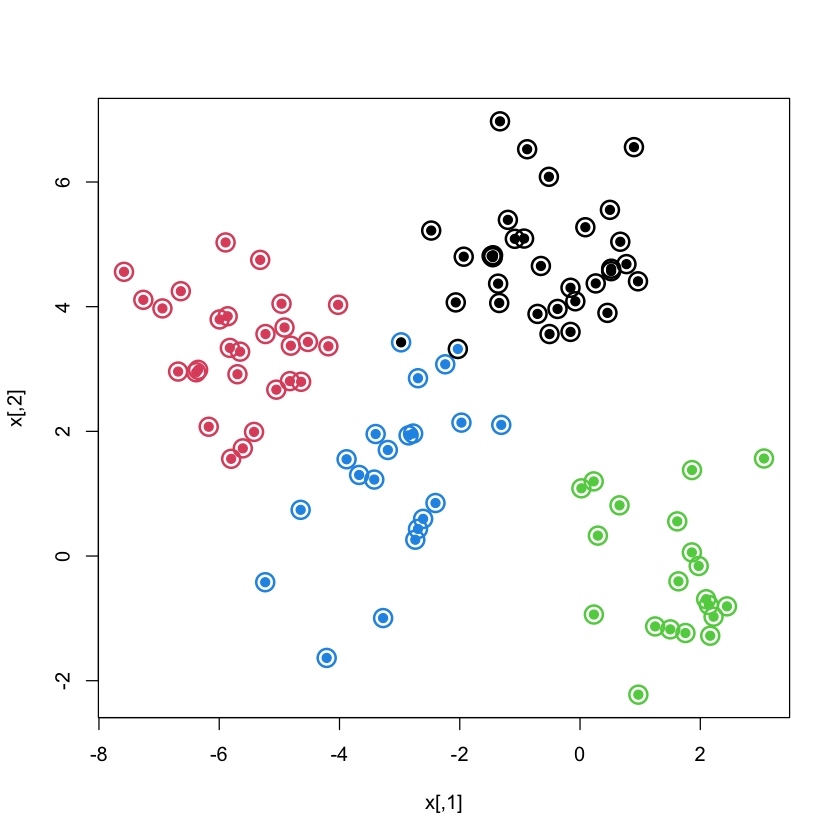

In [27]:
plot(x, col = km.out$cluster, cex = 2, pch = 1, lwd = 2)
points(x, col= which, pch = 19)

# Hierarchial clustering

In [28]:
hc.complete = hclust(dist(x), method = 'complete')

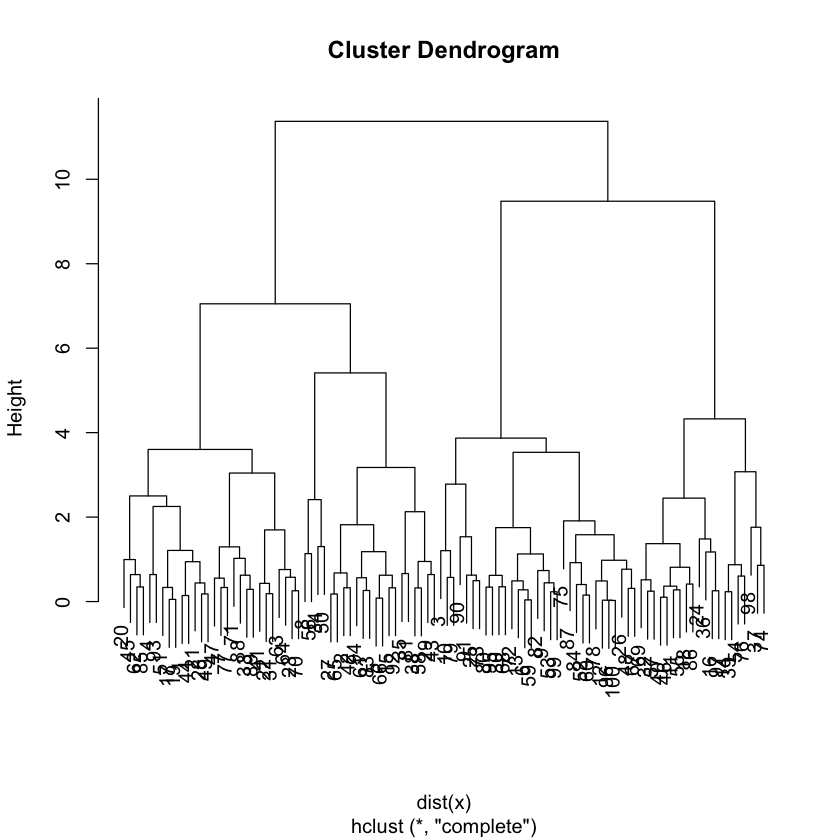

In [29]:
plot(hc.complete)

#dendogram
#bottom up technique

In [30]:
hc.single = hclust(dist(x), method = 'single')
#uses the smallest distance between the clusters

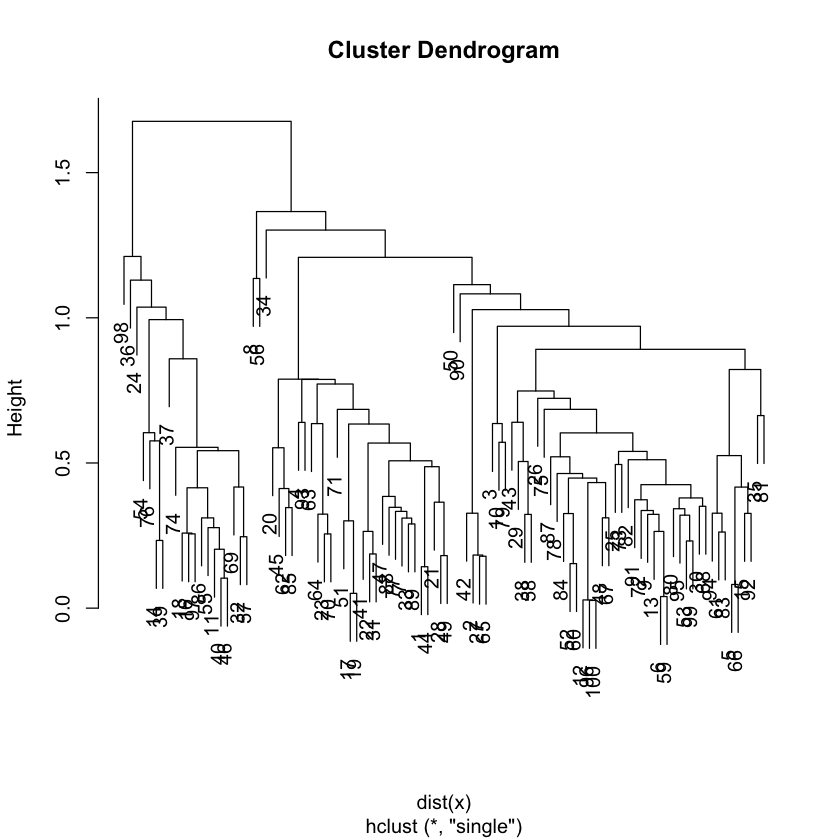

In [31]:
plot(hc.single)

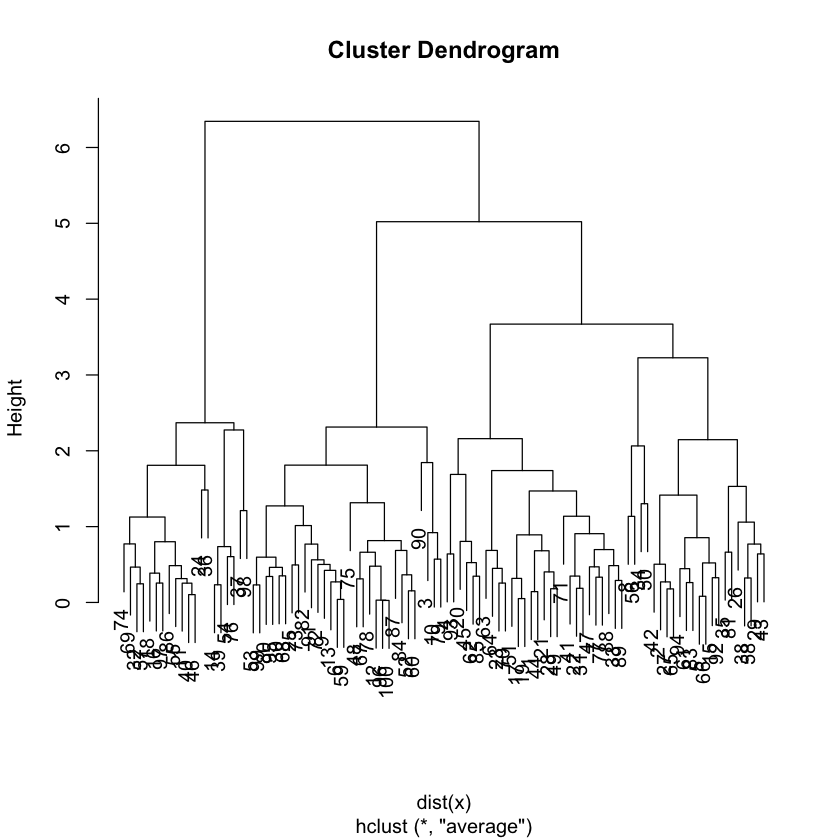

In [32]:
hc.average = hclust(dist(x), method = 'average')
plot(hc.average)

In [33]:
hc.cut = cutree(hc.complete, 4)
table(hc.cut, which)

#no misidentifications!

      which
hc.cut  1  2  3  4
     1  0 28  0  0
     2  1  0  0 20
     3 31  0  0  0
     4  0  0 20  0

In [34]:
table(hc.cut, km.out$cluster)
#1 misidentification

      
hc.cut  1  2  3  4
     1  0 28  0  0
     2  1  0  0 20
     3 31  0  0  0
     4  0  0 20  0

In [35]:
hc.cut = cutree(hc.average, 4)
table(hc.cut, which)
#2 misidentification

      which
hc.cut  1  2  3  4
     1  0 28  0  0
     2  2  0  0 20
     3 30  0  0  0
     4  0  0 20  0

In [36]:
table(hc.cut, km.out$cluster)

      
hc.cut  1  2  3  4
     1  0 28  0  0
     2  2  0  0 20
     3 30  0  0  0
     4  0  0 20  0

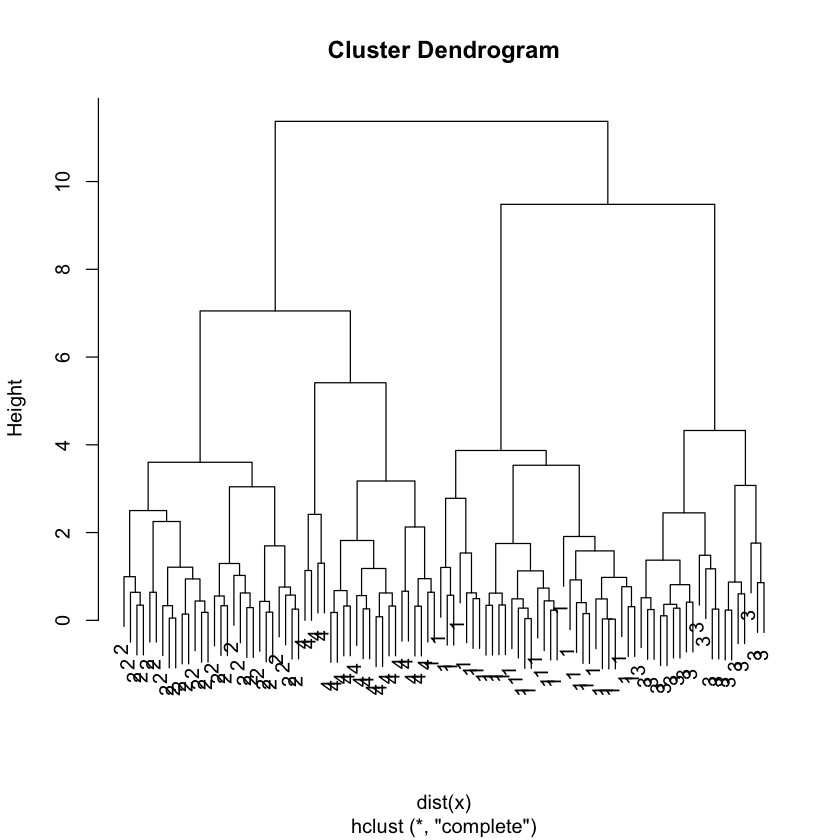

In [37]:
plot(hc.complete, labels = which)

In [38]:
load("/Users/nehamangal/Downloads/STATSX0001  ESLR by Prof Trevor and Tibshirani/10.R.RData")

In [46]:
X = rbind(x, x.test)

In [47]:
nrow(X)

[1] 1300

In [48]:
nrow(x.test)

[1] 1000

In [50]:
pca.out= prcomp(X, scale = TRUE, rank = 5)
pca.out

Standard deviations (1, .., p=200):
  [1] 5.0564664 4.5965404 3.7229223 2.6971281 1.4630811 1.1682700 1.1584782
  [8] 1.1554447 1.1459109 1.1393333 1.1361861 1.1318983 1.1104748 1.1081031
 [15] 1.1022576 1.0996006 1.0925670 1.0862245 1.0851878 1.0747535 1.0694183
 [22] 1.0626451 1.0596740 1.0579027 1.0543595 1.0497312 1.0461509 1.0451297
 [29] 1.0355655 1.0293788 1.0246770 1.0236170 1.0212631 1.0174942 1.0143562
 [36] 1.0111483 1.0051017 1.0002184 0.9971100 0.9942072 0.9913248 0.9854912
 [43] 0.9803071 0.9796830 0.9771657 0.9738685 0.9681446 0.9576192 0.9560902
 [50] 0.9531962 0.9516221 0.9496676 0.9464778 0.9408281 0.9393607 0.9318866
 [57] 0.9263620 0.9257830 0.9229648 0.9195461 0.9177641 0.9152911 0.9101935
 [64] 0.9082005 0.9019688 0.8981175 0.8965373 0.8946101 0.8870541 0.8824777
 [71] 0.8798454 0.8781490 0.8760034 0.8751288 0.8733763 0.8693101 0.8651374
 [78] 0.8610424 0.8569558 0.8562169 0.8548111 0.8498707 0.8464987 0.8451881
 [85] 0.8424197 0.8376215 0.8363309 0.8338686 0.8289

In [59]:
apply(pca.out$rotation, 2, var)

PC1         PC2         PC3         PC4         PC5 
0.005001298 0.005013532 0.005023527 0.004997064 0.005024736

In [66]:
var = (pca.out$sdev^2)

In [68]:
sum(var[1:5])/sum(var)

[1] 0.3498565

In [74]:
fit = lm(y ~ X[1:300, ])

ERROR: Error in model.frame.default(formula = y ~ X[1:300, ], drop.unused.levels = TRUE): invalid type (list) for variable 'X[1:300, ]'
